# Worksheet 07

Name:  
UID: 

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

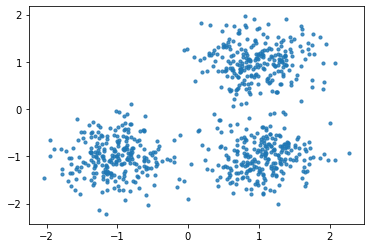

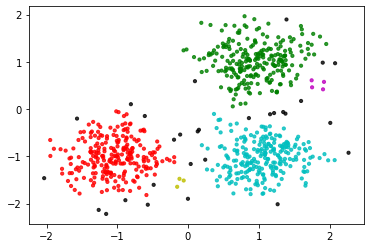

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        def region_query(data, point_index):
            neighbors = []
            for i in range(len(data)):
                if np.linalg.norm(data[point_index] - data[i]) < self.epsilon:
                    neighbors.append(i)
            return neighbors

        def expand_cluster(data, point_index, cluster_id, neighbors):
            clusters[point_index] = cluster_id
            i = 0
            while i < len(neighbors):
                point = neighbors[i]
                if clusters[point] == -1:
                    clusters[point] = cluster_id
                elif clusters[point] == 0:
                    clusters[point] = cluster_id
                    point_neighbors = region_query(data, point)
                    if len(point_neighbors) >= self.min_pts:
                        neighbors.extend(point_neighbors)
                i += 1

        clusters = [0] * len(self.dataset)
        cluster_id = 0

        for point_index in range(len(self.dataset)):
            if clusters[point_index] == 0:
                neighbors = region_query(self.dataset, point_index)
                if len(neighbors) < self.min_pts:
                    clusters[point_index] = -1  # Mark as noise
                else:
                    cluster_id += 1
                    expand_cluster(self.dataset, point_index, cluster_id, neighbors)

        return clusters
        return

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()